# Universal Sentence Encoder

$by: Chinyelugo\space Jeremiah$

In this notebook, we will use a universal sentence encoder to perform semantic search on texts. 

The encoder is different from word level encoders in the sense than the encoder model has been trained on word sequences rather than individual words. The encoder is able to recieve a texts with various lengths and process the text before applying the model.

The encoder model can also be used for a range of tasks such as text classification, clustering and natural language tasks.

#### Use case
In the context of this project, a universal sentence can be used for pre-limary filtering of large corpus of text. Let's say we have a lot of text can we want a fast way segmenting them based on their content. A universal encoder can be uselful in such situation. We can then decide to filter them further by using a text clustering algorithm.

##### Importing the packages

In [1]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# reduce logging verbosity
logging.set_verbosity(logging.ERROR)

In [2]:
# loading the universal encoder from TF Hub

url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(url)

In [3]:
# creating an embedding function for our model

def embed(input):
    return model(input)

#### Testing the model

Texts do not need to have the same length as various lengths are supported by the encoder

In [4]:
word = "Lion"

sentence_1 = "Black holes are fascinating and destructive"

sentence_2 = "The Denver Nuggets just won the nba 2023 championship!"

paragraph_1 = (
    "The NBA is a premier basketball league in the US, captivating fans with its exceptional talent, intense competition, and iconic franchises." 
    "From legendary players to thrilling games, the NBA has become a global phenomenon, uniting basketball enthusiasts worldwide and leaving a lasting impact on the sport and popular culture.")

paragraph_2 = (
    "Quasi-stars, hypothetical celestial objects, challenge our understanding of the early universe. "
    "These fascinating entities are believed to have formed from collapsing gas clouds, with a central black hole acting as a gravitational engine. "
    "The immense energy released during their accretion process makes quasi-stars some of the brightest objects in the cosmos, offering valuable insights into the cosmic processes that shaped the galaxies we observe today."
)

paragraph_3 = (
    "Animals in the wild embody the beauty and diversity of nature. "
    "From majestic predators to delicate creatures, they navigate their habitats, adapting and thriving in their natural environments, reminding us of the intricate web of life that exists beyond human civilization."
)

In [5]:
texts = [word, sentence_1, sentence_2, paragraph_1, paragraph_2, paragraph_3]

In [6]:
# computing text

with tf.device('/CPU:0'):
    text_embeddings = embed(texts)

In [7]:
print(f"Text embeddings shape: {text_embeddings.shape}\n")
print(f"Text embeddings:\n{text_embeddings}")

Text embeddings shape: (6, 512)

Text embeddings:
[[-0.03834185 -0.06606962  0.06509203 ... -0.00038135  0.01159316
  -0.0734603 ]
 [-0.00043939  0.02973366  0.06423719 ... -0.02067394 -0.05412583
  -0.0160534 ]
 [ 0.00840423 -0.07117473  0.07711636 ... -0.0526526  -0.07766477
   0.02771021]
 [-0.01619054 -0.0421274   0.06651131 ... -0.07013927 -0.07107645
   0.02778227]
 [-0.0500872   0.02177463  0.00407351 ... -0.0176439  -0.02519582
  -0.01169977]
 [-0.03507586  0.01694722  0.05540963 ... -0.0285835   0.01375274
   0.07252461]]


**Performing semantic seach on our texts**

So how does the model perform the search?
- the model has been trained on a variety of data, and computes the semantic similarity of texts by calculating the inner product of the embeddings.

In [8]:
# creating the function for performing and visualizing the textual similarity

labels = ['Lion', 'Black holes', 'Denver Nuggets', 'NBA', 'Quasi-Stars', 'Animal kingdom']

def plot_similarity(features, labels, rotation=45):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    
    plt.figure(figsize=(12,8))
    g = sns.heatmap(
        corr, xticklabels=labels, yticklabels=labels,
        vmin=0, vmax=1, cmap="gray_r"
    )
    
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity", fontsize=20, weight='bold')
    
def run_and_plot(texts):
    text_embeddings = embed(texts)
    plot_similarity(text_embeddings, labels)

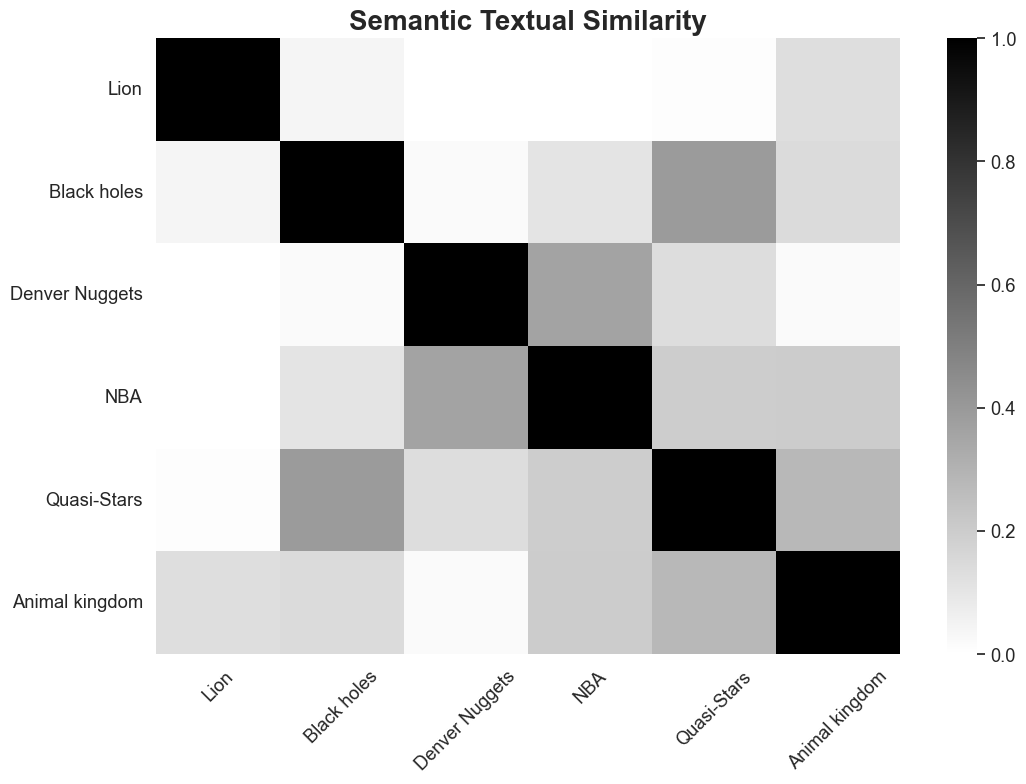

In [9]:
with tf.device('/CPU:0'):
    run_and_plot(texts)

From the heatmap above we can see that as expected, `Lion` & `Animal Kingdom` have been deemed similar, even though the first feature was just a word (Lion). 

`Black holes` & `Quasi-Stars` also have a high similarity, same as `Denver Nuggets` & `NBA`.

This encoder can used in various way to filter through a large corpus text regardless of the input length of each text in the corpus.

#### Trying the model on texts with 1000 words

In [10]:
text_1 = """The Premier League, often hailed as the pinnacle of football in England, stands as a testament to the nation's deep-rooted passion for the beautiful game. With its rich history, captivating rivalries, and world-class talent, the league has become a global phenomenon that captivates fans around the world.

Established in 1992, the Premier League revolutionized English football, introducing a new era of excitement and competitiveness. The league is home to some of the most storied clubs in the sport, including Manchester United, Liverpool, Arsenal, and Chelsea, each with their own illustrious traditions and devoted fan bases.

The Premier League showcases the highest level of footballing excellence, attracting top players from every corner of the globe. From the breathtaking skills of Lionel Messi and Cristiano Ronaldo to the tactical brilliance of Pep Guardiola and Jurgen Klopp, the league boasts a dazzling array of talent that leaves fans in awe.

Matchdays in the Premier League are a spectacle to behold. The roar of the crowd, the electrifying atmosphere, and the intensity of the competition create an unparalleled experience for both players and fans. The stadiums reverberate with chants, cheers, and the occasional gasp of disbelief as goals are scored, tackles are made, and moments of brilliance unfold before the spectators' eyes.

The battle for the Premier League title is a fiercely contested affair, with clubs vying for the ultimate glory. Each season brings a fresh wave of anticipation and hope as teams embark on a grueling campaign of 38 matches, facing off against their rivals in a quest for supremacy. The ebb and flow of the league table, the twists and turns of fortune, add an element of drama that keeps fans on the edge of their seats until the final whistle.

Beyond the title race, the Premier League offers a multitude of captivating storylines. The fight for a top-four finish, securing qualification for coveted European competitions, ignites fierce rivalries and raises the stakes even higher. Clubs battling to avoid relegation display an unwavering determination, knowing that the consequences of failure can be devastating.

The Premier League is not just about the on-field action; it has also become a stage for global stars to leave an indelible mark on the footballing world. From Thierry Henry's graceful elegance to Steven Gerrard's never-say-die spirit, the league has witnessed countless iconic moments and performances that will forever be etched in the annals of football history.

The league's impact extends far beyond the pitch. It serves as a catalyst for community engagement, bringing people together and instilling a sense of belonging. Football unites fans from all walks of life, transcending barriers of language, culture, and background. From the jubilant celebrations to the heart-wrenching defeats, the Premier League sparks emotions and creates lasting memories that bind fans in a shared experience.

The Premier League's global appeal is undeniable. Its broadcasts reach millions of households worldwide, allowing fans to connect with the passion and excitement from afar. Supporters gather in pubs, homes, and stadiums across continents, donning their team's colors and rallying behind their heroes. The league's popularity has transcended borders, making it a cultural phenomenon that transcends the boundaries of nations.

As the Premier League continues to evolve, it remains an integral part of English football's identity. It embodies the spirit of competition, the pursuit of excellence, and the unyielding love for the game. From the legends of the past to the stars of the present, the Premier League encapsulates the essence of football, enchanting fans and inspiring generations to come."""

text_2 = """Black holes, enigmatic cosmic objects of immense gravity, continue to fascinate and baffle scientists and enthusiasts alike. These mysterious entities, born from the gravitational collapse of massive stars, possess gravitational forces so strong that nothing, not even light, can escape their clutches. They stand as cosmic gateways into the unknown, challenging our understanding of the universe and captivating our imagination.

At the heart of a black hole lies the singularity, a point of infinite density and zero volume. Surrounding the singularity is the event horizon, an invisible boundary beyond which the gravitational pull is so intense that escape becomes impossible. Anything that crosses this boundary is forever trapped, disappearing from our observable universe. It is this eerie concept that gives black holes their name, as they appear as regions of darkness against the backdrop of the cosmos.

Black holes come in different sizes, ranging from stellar black holes, formed from the remnants of massive stars, to supermassive black holes, residing at the centers of galaxies and weighing millions or even billions of times the mass of our Sun. The supermassive black hole at the heart of our Milky Way galaxy, known as Sagittarius A*, is a cosmic behemoth that exerts a powerful gravitational influence on surrounding stars and gas clouds.

The study of black holes has revealed astounding insights into the nature of space, time, and gravity. Einstein's theory of general relativity predicts their existence and provides a framework for understanding their properties. According to general relativity, black holes warp the fabric of spacetime, creating deep gravitational wells that dictate the movement of objects nearby. Time itself is affected by their immense gravity, slowing down in their vicinity.

One of the most intriguing aspects of black holes is their ability to devour matter and energy. As material falls towards a black hole, it forms an accretion disk, a swirling disk of superheated gas and dust. Friction within the disk causes it to emit intense radiation, making it visible across various wavelengths. These glowing disks, often accompanied by powerful jets of high-energy particles, can be observed from great distances and provide crucial clues about the physics at play.

Black holes are not merely celestial vacuum cleaners; they also have the potential to unleash tremendous energy in cataclysmic events. When matter falls into a black hole, it releases an enormous amount of energy in the form of powerful jets and gamma-ray bursts. These energetic outbursts can be observed across vast cosmic distances and have a profound impact on the surrounding environment, shaping the evolution of galaxies and influencing the formation of new stars.

The existence of black holes raises profound questions about the fate of matter and information that enter their domain. The paradox of information loss, known as the black hole information paradox, suggests that information swallowed by a black hole may be forever lost, violating the fundamental principles of quantum mechanics. Scientists continue to grapple with this conundrum, seeking a deeper understanding of the interplay between gravity and quantum physics.

In recent years, the detection of gravitational waves has opened up new avenues for studying black holes. Gravitational waves are ripples in the fabric of spacetime caused by violent cosmic events, such as the merger of two black holes. Advanced instruments, like the Laser Interferometer Gravitational-Wave Observatory (LIGO), have allowed scientists to directly detect these elusive waves, confirming Einstein's predictions and providing insights into the properties of black holes.

Black holes also have implications for the ultimate fate of the universe. As they consume surrounding matter and grow in size, they play a significant role in the cosmic balance between expansion and gravity."""

text_3 = """The animal kingdom, a vast and diverse realm teeming with life, encompasses a remarkable array of species, each uniquely adapted to its environment. From the tiniest insects to the majestic mammals, the animal kingdom showcases the wonders of nature, captivating our imagination and providing us with invaluable insights into the intricacies of life on Earth.

Animals, as living beings, share common characteristics that distinguish them from other forms of life. They are multicellular organisms, capable of movement, reproduction, growth, and response to stimuli. However, it is their remarkable diversity in form, behavior, and habitat that truly astounds us.

One of the defining features of the animal kingdom is its incredible diversity. It is estimated that there are over 1.5 million known animal species, with countless more yet to be discovered. From the vast oceans to the dense rainforests, animals have colonized nearly every corner of the planet, adapting to a wide range of environments and niches.

The animal kingdom is divided into several major groups, or phyla, each with its own distinct characteristics. These phyla include mammals, birds, reptiles, amphibians, fish, and invertebrates such as insects, crustaceans, and mollusks. Within each phylum, there are further subdivisions, reflecting the astonishing variety of life forms.

Mammals, a group to which humans belong, are characterized by their ability to nurse their young with milk produced by mammary glands. They exhibit a wide range of adaptations, from the incredible size and strength of elephants to the agility and grace of dolphins. Mammals have conquered nearly every habitat on Earth, from the freezing Arctic to the scorching deserts, displaying remarkable versatility and adaptability.

Birds, with their ability to fly, are among the most captivating creatures in the animal kingdom. They possess feathers, hollow bones, and specialized respiratory systems that enable them to take to the skies. Birds come in a breathtaking array of colors, sizes, and shapes, from the delicate hummingbirds to the magnificent birds of prey. Their songs and complex behaviors add to their allure, captivating both scientists and nature enthusiasts alike.

Reptiles, known for their scaly skin and cold-blooded nature, have evolved a variety of adaptations to survive in diverse environments. From the stealthy ambush of a crocodile to the dazzling colors of a chameleon, reptiles have mastered the art of camouflage and display an astonishing array of survival strategies. They occupy habitats ranging from arid deserts to lush rainforests, carving out their place in the intricate web of life.

Amphibians, including frogs, toads, and salamanders, bridge the gap between aquatic and terrestrial habitats. They undergo metamorphosis, transforming from aquatic larvae to adult forms capable of living on land. Amphibians are highly sensitive to environmental changes, making them valuable indicators of ecosystem health. Unfortunately, many amphibian species face significant threats due to habitat loss and climate change, highlighting the importance of conservation efforts.

Fish, the largest group of vertebrates, dominate the aquatic world. They exhibit an incredible range of sizes, shapes, and adaptations, allowing them to thrive in diverse aquatic environments. From the tiny, colorful reef fish to the massive, ancient sharks, fish have evolved an impressive array of sensory organs, locomotion methods, and feeding strategies.

Invertebrates, which make up the majority of animal species, lack a backbone but display an astounding diversity of forms and functions. Insects, the most abundant group of animals, play vital roles in pollination, decomposition, and nutrient cycling. They have colonized nearly every terrestrial habitat, showcasing an astonishing array of body shapes, behaviors, and life cycles. Other invertebrates, such as spiders, crustaceans, and mollusks, exhibit"""

text_4 = """Quasi-stars, enigmatic celestial objects that push the boundaries of our understanding, represent a fascinating chapter in the story of the universe. These hypothetical stars, also known as "quasistellar objects," are believed to have formed during the early stages of the universe, when the conditions were vastly different from what we observe today. Although never directly observed, scientists have pieced together intriguing theories about these cosmic phenomena, painting a picture of immense power and astronomical significance.

The concept of quasi-stars emerged from the intriguing realm of theoretical astrophysics. According to prevailing theories, quasi-stars are thought to have formed in the early universe, a time when massive gas clouds collapsed under their own gravity, initiating the birth of stars. However, unlike conventional stars, quasi-stars underwent a unique process of evolution, driven by an extraordinary power source at their cores.

At the heart of a quasi-star, instead of a conventional fusion-driven core, lies a central black hole. This black hole acts as a gravitational engine, drawing in surrounding matter and releasing vast amounts of energy in the process. The intense gravitational pull allows the quasi-star to accrete matter from its surroundings, building up a massive envelope of gas.

The accretion process feeds the black hole at the center, generating tremendous heat and radiation. As the gas falls into the black hole, it forms an accretion disk, similar to those observed around active galactic nuclei. The disk heats up and emits an astonishing amount of energy, making quasi-stars some of the brightest objects in the universe. Their luminosity surpasses that of ordinary stars by several orders of magnitude, earning them the title of "quasi-stellar objects" or "quasars."

The energy output of quasi-stars is so immense that it counteracts the inward pull of gravity, preventing the collapse of the entire structure. This balance between gravity and radiation pressure allows the quasi-star to maintain its stability and continue its growth. The process is akin to a cosmic tug-of-war, with the black hole's gravitational force competing against the outward force generated by the energy released during accretion.

Quasi-stars are believed to have been short-lived cosmic phenomena, existing only during a specific epoch in the early universe. The prevailing theory suggests that as the quasi-star continues to accrete matter, it eventually exhausts its supply and reaches a critical point. At this stage, the intense radiation pressure halts the accretion process, cutting off the fuel supply to the central black hole.

Without new material to sustain the energy production, the quasi-star's luminosity begins to fade. As the envelope of gas disperses into space, the black hole at its core is left behind. The remnants of the quasi-star transition into a more familiar state, resembling a supermassive black hole that we observe in modern galaxies. This process of quasi-star evolution provides a plausible mechanism for the formation of supermassive black holes, which are prevalent in the centers of galaxies throughout the universe.

While quasi-stars have not been directly observed, their potential existence offers valuable insights into the early universe and the cosmic processes that shaped it. The study of quasi-stars allows scientists to explore the interplay between gravity, black holes, and the formation of galaxies. By analyzing the properties of quasars, such as their energy spectra and redshift, researchers can gain a deeper understanding of the conditions that prevailed billions of years ago.

Despite the theoretical nature of quasi-stars, their significance in shaping our universe cannot be underestimated. These cosmic powerhouses provide a bridge between the birth of stars and the formation of galaxies, connecting different chapters in the cosmic narrative. They represent a time when the universe was in a state of dynamic transformation, laying the foundation for the structures we observe today."""

text_5 = """The National Basketball Association (NBA), a premier professional basketball league in the United States, stands as a symbol of athleticism, competition, and entertainment. With its rich history, talented players, and passionate fan base, the NBA has become a cultural phenomenon that transcends the boundaries of sports, captivating audiences across the nation and around the world.

The NBA traces its roots back to 1946 when it was founded as the Basketball Association of America (BAA). Over the years, the league expanded and evolved, merging with the National Basketball League (NBL) in 1949 to form the NBA as we know it today. From its humble beginnings, the league has grown into a global powerhouse, attracting the best basketball talent from around the world.

At the heart of the NBA are the teams that compete for the coveted Larry O'Brien Championship Trophy. The league currently consists of 30 teams, with franchises located in major cities across the United States. Each team represents its city and its devoted fan base, creating a sense of pride and community that extends beyond the basketball court.

The NBA season kicks off in October and extends into the following year, culminating in the highly anticipated NBA Finals. Throughout the regular season, teams battle for playoff positions, aiming to secure a spot in the postseason. The playoffs serve as the ultimate test of skill, strategy, and determination, as teams compete in a series of intense matchups to advance toward the NBA Finals.

The NBA is renowned for its exceptional talent and star players who captivate audiences with their skills, athleticism, and charisma. From legends like Michael Jordan, Magic Johnson, and Larry Bird to modern-day icons such as LeBron James, Stephen Curry, and Kevin Durant, these players have left an indelible mark on the sport, elevating it to new heights and inspiring future generations of basketball enthusiasts.

In addition to the players, the NBA is defined by its iconic franchises and their storied histories. Teams like the Boston Celtics, Los Angeles Lakers, Chicago Bulls, and Miami Heat have become synonymous with success and championship glory. These organizations have cultivated winning traditions, celebrated rivalries, and unforgettable moments that have become an integral part of the league's legacy.

Beyond the on-court action, the NBA has embraced innovation and entertainment, enhancing the fan experience in remarkable ways. From the electrifying slam dunks to the breathtaking three-pointers, every game offers a spectacle of skill and athleticism. The league has also embraced technology, introducing features like instant replay, advanced statistics, and virtual reality experiences that allow fans to engage with the game in new and immersive ways.

The NBA's influence extends beyond the basketball court, making a positive impact on communities through its social initiatives. The league and its players have been at the forefront of promoting social justice, addressing inequality, and championing important causes. From supporting education programs to advocating for racial equality, the NBA has used its platform to effect change and inspire hope in the face of adversity.

The popularity of the NBA has transcended borders, turning the league into a global phenomenon. Fans from around the world tune in to watch games, follow their favorite players, and support their chosen teams. The NBA's international outreach has led to the emergence of talented players from various countries, enriching the league with diverse styles of play and bringing cultures together through the love of basketball.

The NBA's impact on popular culture cannot be understated. Beyond the sport itself, the league has inspired fashion trends, influenced music, and become intertwined with the entertainment industry. NBA jerseys have become fashion statements, worn by fans and celebrities alike. Players have crossed over into the realm of entertainment, appearing in movies, TV shows, and music videos, further solidifying the NBA's status as a cultural phenomenon."""

In [11]:
texts_1k_words = [text_1, text_2, text_3, text_4, text_5]

In [12]:
labels = ['English Premier League', 'Black-holes', 'Animal Kingdom', 'Quasi-Stars', 'NBA']

def plot_similarity(features, labels, rotation=45):
    corr = np.inner(features, features)
    min_val, max_val = corr.min(), corr.max()
    #np.fill_diagonal(corr, 0)
    sns.set(font_scale=1.2)
    
    plt.figure(figsize=(12,8))
    g = sns.heatmap(
        corr, xticklabels=labels, yticklabels=labels,
        vmin=min_val, vmax=max_val, cmap="gray_r"
    )
    
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity", fontsize=20, weight='bold')
    
def run_and_plot(texts):
    text_embeddings = embed(texts)
    plot_similarity(text_embeddings, labels)

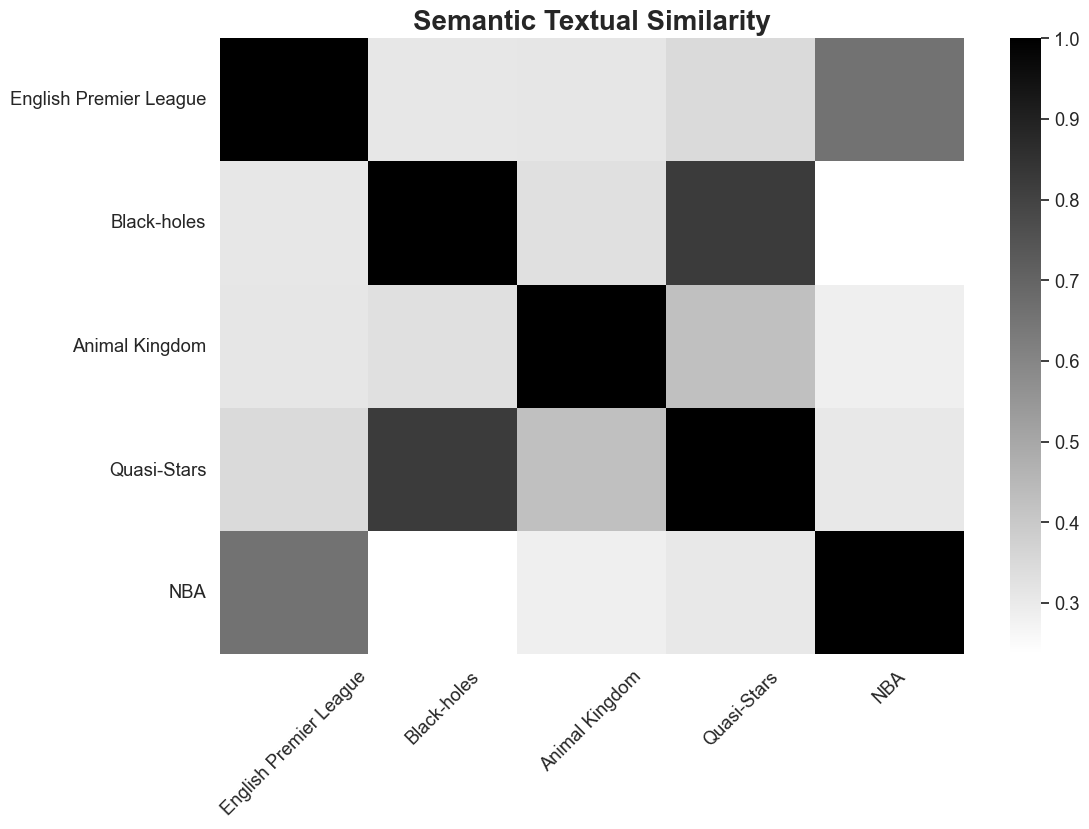

In [13]:
with tf.device('/CPU:0'):
    run_and_plot(texts_1k_words)

Again, we have been able to performing semantic seach on texts with 1,000 words.

`English Premier League` & `NBA` have been deemed similar by the model even though they are completely different sports played in different cotinents. 

Of course `Quasi-Stars` & `Black-holes` are similar as well

`Animal Kingdom` shares no similarity with any of the other texts, the closest in `Quasi-Stars` (who knows why) bu then again the similarity isn't much